#Solar Cycles


Authors: Danielle Dineen and Ishika Bangari

Editors: Simran Nerval

In [1]:
#@title Import Libraries
#@markdown Press the play button to the left of this cell to run this cell so you can load in libraries that will be needed to run this notebook.

import numpy as np
import pandas as pd

from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

from ipywidgets import interact
import ipywidgets as widgets

from IPython.display import display


<div>
<img src="https://images-assets.nasa.gov/image/GSFC_20171208_Archive_e001435/GSFC_20171208_Archive_e001435~large.jpg?w=1920&h=1920&fit=clip&crop=faces%2Cfocalpoint" width="500"
    alt="Diagram demonstrating center of mass" />
<figcaption>Fig 1. Image of the Sun from June 20, 2013 showing the bright light of a solar flare on the left side of the Sun and an eruption of solar material shooting through the Sun’s atmosphere. Shortly thereafter, this same region of the Sun sent a coronal mass ejection out into space. We will explain what these kinds of solar activity are in this notebook (Credit: NASA/SDO).</figcaption>
</div>

## Objectives

* Understand the structure of the Sun
* Understand solar activity and the solar cycle
* Understand the idea of a cyclic phenomenon with a period and estimate this period by eye
* Understand how to estimate the period of a cyclic phenomenon by overlaying a periodic function
* Understand how to use $\texttt{curve_fit}$ to estimate the parameters of a function



## Anatomy of the Sun

The Sun is a G-type main-sequence star which formed approximately 4.6 billion years ago and is mainly composed of the elements hydrogen and helium. We will first go over the structure of the Sun before we discuss the solar activity that contributes to solar cycles.



<div>
<img src="https://www.esa.int/var/esa/storage/images/esa_multimedia/images/2019/10/anatomy_of_our_sun/20818448-1-eng-GB/Anatomy_of_our_Sun_pillars.jpg" width="800"
     />
<figcaption>Fig 2. Diagram of the anatomy of the Sun (Credit: ESA).</figcaption>
</div>


### Solar Interior

The Sun is a massive ball of hot gas with a radius of about 695,700 km. It has four main layers from the inside out: the core, radiative zone, tachocline, and convective zone. Let's explore these layers:

**Core:** This is the heart of the Sun, where its energy is produced. The core is extremely hot and dense, making up the central 25% of the Sun. Here, nuclear reactions occur, creating the energy that powers the Sun.

**Radiative Zone:** The energy created in the core moves outward through this thick layer called the radiative zone. In this zone, energy travels slowly as it is absorbed and re-emitted by particles in a process called radiation.

**Tachocline:** The tachocline is a thin layer between the radiative and convective zones. It's believed that the Sun's magnetic field is generated here. Recall a magnetic field is s the region around a magnetic material within which the force of magnetism acts which can be repreented by lines that follow the direction of the field at each point.

**Convective Zone:** In the outer 25% of the Sun, energy moves by boiling motion, similar to how water boils in a pot. This layer is called the convective zone. Here, hot gases rise to the surface, cool down, and then sink back down to be heated again.


<div>
<img src="https://scied.ucar.edu/sites/default/files/styles/extra_large/public/images/Sun%20Interior_0.jpg.webp?itok=24L8FL5D" width="650"
    />
<figcaption>Fig 3. Image of the Sun with cut-away portion showing the solar interior (Credit: NASA).</figcaption>
</div>


### Solar Atmosphere

The Sun's atmosphere is the outer layer of the Sun, and it has four main parts: the photosphere, chromosphere, transition region, and corona. Let's look at each layer:

**Photosphere:** This is the Sun's visible surface, about 100 kilometers thick, which is slightly less see-through than Earth's air. The photosphere is the layer of the Sun which is the only part that we can see from Earth on a typical day. Its temperature ranges from about 6500 degrees Kelvin (which we will denote as K, where 0K = -273.1°C) at the bottom to 4000K at the top. The splotchy appearance of the photosphere is due to granules which originates from the convective zone in the solar interior.

**Chromosphere:** This layer is above the photosphere and its temperature varies from about 4000K at the bottom to 8000K at the top. The chromosphere appears bright red because the hydrogen in the Sun emits a reddish-colored light at high temperatures.

**Transition Region:** This is a very thin layer where the temperature rises sharply from about 8000K to around 500,000K, as it transitions into the corona.

**Corona:** This is the outermost part of the Sun's atmosphere. It has a temperature of about 500,000K. The corona is not visible to the naked eye except during a total solar eclipse, like the one that occurred in April 2024. During this eclipse, the Moon covered the Sun's bright photosphere, allowing us to see the faint glow of the corona.



<div>
<img src="https://eclipse2017.nasa.gov/static/img/sun/the_sun_1.jpg" width="500"
    />
<figcaption>Fig 4. Chromosphere and corona visible during 2017 total solar eclipse (Credit: NASA).</figcaption>
</div>






## Solar Activity
 We will now go over solar activity including sunspots, flares and coronal mass ejections (CMEs) that contribute to the solar cycle.

### Sunspots

Sunspots are dark spots on the Sun's surface that are cooler than the areas around them. They are caused by strong magnetic fields that stop the hot gas from moving around, making these spots cooler. Sunspots usually appear in pairs with opposite magnetic charges.

**Lifespan and Movement:** Sunspots can last from a few days to a few months. They grow and shrink as they move across the Sun's surface, and their sizes can range from 16 km to 160,000 km. Some large sunspots can be seen from Earth without a telescope. They move at speeds of a few hundred meters per second when they first appear.

**Magnetic Activity:** Sunspots are linked to intense magnetic activity. They often come with other solar phenomena like solar flares which we will describe later.

**Starspots:** Similar spots on other stars are called starspots. These can also be light or dark and show up as magnetic activity on those stars.

**Structure of Sunspots:** Sunspots have two main parts:
1. **Umbra:** This is the dark center of the sunspot, where the magnetic field is strongest and vertical.
2. **Penumbra:** This brighter area surrounds the umbra and has a more tilted magnetic field. The penumbra is made of structures called penumbral filaments.

In a group of sunspots, several umbrae can be surrounded by a single penumbra.

<div>
<img src="https://www.cs.cmu.edu/~deano/VSEP/deans_spot.gif"
width="300"
    />
<figcaption>Fig 5. Diagram of sunspots (Credit: NASA).</figcaption>
</div>

### Solar Flares and Coronal Mass Ejections (CMEs)

**Solar Flares:** Bursts of electromagnetic radiation from the Sun's atmosphere. They can heat up the surrounding plasma to over 10 million degrees Kelvin and accelerate particles like electrons and protons to nearly the speed of light. These flares emit energy across the entire electromagnetic spectrum, from radio waves to gamma rays.

**Where They Happen:** Flares occur in active regions on the Sun, often around sunspots. These areas have strong magnetic fields that reach from the Sun's surface (photosphere) to the outer atmosphere (corona). Flares are powered by the sudden release of magnetic energy stored in the corona, happening in minutes to tens of minutes.

**Flare Sprays:** Linked to solar flares, these are faster ejections of plasma that travel at speeds from 20 to 2000 kilometers per second.

**Coronal Mass Ejections (CMEs):** Sometimes, the same energy that causes solar flares can also cause CMEs. CMEs are massive bursts of solar wind and magnetic fields rising above the solar corona or being released into space. They send large amounts of plasma, mostly electrons and protons, along with their magnetic fields, into space.

**Structure of CMEs:** The matter ejected during a CME often contains a helical (a twisted, spiral shape) magnetic field structure called a flux rope. These CMEs come from twisted or stretched magnetic fields in the corona, which are held in balance by the magnetic fields above them.


<div>
<img src="https://science8sc.weebly.com/uploads/1/3/2/7/132773018/published/cme-gif.gif?1609840956"
width="500"
     />
<figcaption>FIg 6. Evolution of magnetic field lines during a CME (Credit: NASA's Goddard Space Flight Center).</figcaption>
</div>



## Solar Cycle

### Periodic Phenomenon

Periodic phenomena are events or relationships that exhibit a repeating pattern over time such that there is a regular time interval between the their occurence. This could be a mass on a spring which returns to a given position after a fixed time or the rotation of the earth on its axis with a 24-hour period called a day.

<div>
<img src="https://forum.padowan.dk/misc.php?action=pun_attachment&item=469&download=0f"
width="400"
   />
<figcaption> (Credit: Vincent Taylor)</figcaption>
</div>


**Periodic function:**  A cyclic function that repeats its values at regular intervals and can be used to describe periodic phenomena, oscillations and waves.


**Period:** The interval of time between repeated events is called the period. This can be measured on a periodic function as the distance on the x-axis from peak to peak (highest value the function obtains) or trough to trough (lowest value the function obtains).


Below is an example of a periodic function. The period of the function is also shown as the distance between two troughs of the curve. Can you think of any other periodic phenomenon in nature? What is the period of its cycle?
<div>
<img src="https://www.radfordmathematics.com/functions/circular-functions/transformed-cosine-sine-curves/wave-number-read-from-curve-example-1.png"
width="800"/>
<figcaption> Fig 7. Diagram showing period of a cosine function (Credit: RadfordMathematics).</figcaption>
</div>




##Periodic Solar Activity

The solar cycle also known as the **Schwabe cycle**, is a periodic change in the Sun's activity. This change in the Sun's activity can be measured in terms of variations in the number of observed sunspots on the Sun's surface. We will be using data which has recorded sunspot numbers over the past 275 years in order to investigate the period of the solar cycle.

Over the period of a solar cycle, levels of solar radiation and ejection of plasma, the number and size of sunspots and solar flares all fluctuate between minimum activity and maximum activity, then back. During each solar cycle, when solar activity is near its maximum, the magnetic field of the Sun flips. At the end of two solar cycles the Sun's magnetic field would then be in its starting position.

The following set of images are taken by the Extreme Ultraviolet Imaging Telescope (EIT). Ultraviolet (UV) light is electromagnetic radiation of wavelengths shorter than visible light and cannot be seen with the human eye.  These images show ultraviolet light radiating from the layer of the atmosphere just above the Sun’s surface at both a time of solar maximum activity and minimum acivity.

<div>
<img src="https://eoimages.gsfc.nasa.gov/images/imagerecords/37000/37575/sun_eit_2009077.jpg"
width="700"
    />
<figcaption>Fig 8. Image on the left showing maximum solar activity on July 19, 2000, with several extremely hot spots around the mid-latitudes. On the right, March 18, 2009 the Sun can be seen as much less active.(Credit: EIT Consortium).</figcaption>
</div>


##Coding Exercises

### Exercise 1: Read in sunspot data

We will explore sunspot data taken from [Solar Influences and Data Analysis Center](https://www.sidc.be/SILSO/datafiles) using pandas and plot the data.

In [2]:
#IMPORT DATA from webpage https://www.sidc.be/SILSO/datafiles 13-month smoothed monthly total sunspot number [1/1749 - now]

!wget https://www.sidc.be/SILSO/DATA/SN_m_tot_V2.0.txt

# Load data using np.loadtxt()
data = np.loadtxt("SN_m_tot_V2.0.txt",float, usecols= (2,3))

x = data[:,0]  # Independent variable (x) is time
y = data[:,1]  # Dependent variable (y) is sunpot number

--2024-07-02 20:13:07--  https://www.sidc.be/SILSO/DATA/SN_m_tot_V2.0.txt
Resolving www.sidc.be (www.sidc.be)... 193.190.230.16
Connecting to www.sidc.be (www.sidc.be)|193.190.230.16|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 125628 (123K) [text/plain]
Saving to: ‘SN_m_tot_V2.0.txt’

SN_m_tot_V2.0.txt   100%[===================>] 122.68K   343KB/s    in 0.4s    

2024-07-02 20:13:08 (343 KB/s) - ‘SN_m_tot_V2.0.txt’ saved [125628/125628]



In [3]:
# CREATE A DATAFRAME

# TRY: Create a pandas dataframe to store the data
df = pd.DataFrame(data)
df.columns = ["Year", "Sunspot Number"]

# Try: Extract the columns as a list and print them
cols = df.columns.to_list()
print(cols)

# Show dataframe
df

['Year', 'Sunspot Number']


,Year,Sunspot Number
0,1749.042,96.7
1,1749.123,104.3
2,1749.204,116.7
3,1749.288,92.8
4,1749.371,141.7
...,...,...
3301,2024.124,124.7
3302,2024.206,104.9
3303,2024.288,136.5
3304,2024.373,171.7


In [4]:
# EXPLORE THE SUNSPOT DATA

# Find the minimum, maximum, average/mean of sunspots
min_sunspots = np.min(y)
max_sunspots = np.max(y)
mean_sunspots = np.mean(y)

# TRY: Print min_sunspots, max_sunspots, mean_sunspots
print('Minimum number of sunspots:', min_sunspots)
print('Maximum number of sunspots:', max_sunspots)
print('Mean number of sunspots:', mean_sunspots)

Minimum number of sunspots: 0.0
Maximum number of sunspots: 398.2
Mean number of sunspots: 81.8749243799153


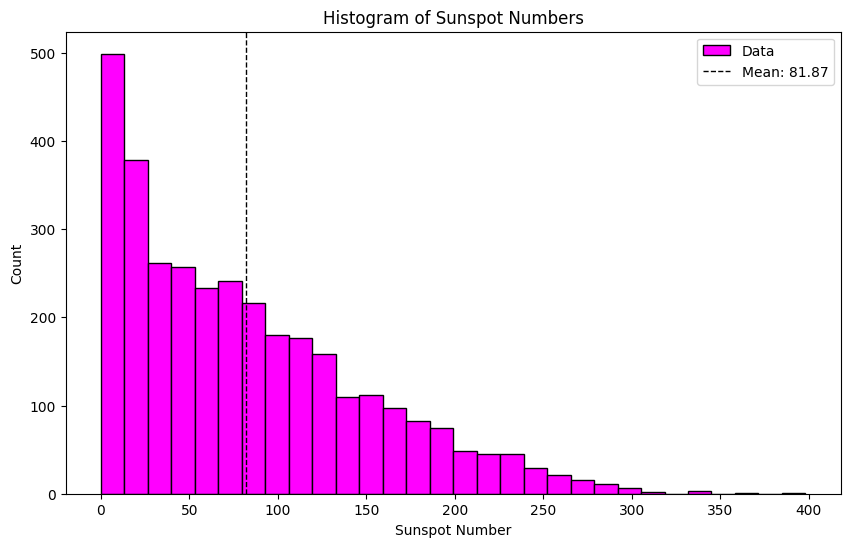

In [5]:
# PLOT A HISTOGRAM

# TRY: Add an appropriate title and label the axes
fig = plt.figure(figsize=(10, 6))
plt.hist(y, bins=30, color='magenta', edgecolor='black', label="Data")
plt.title('Histogram of Sunspot Numbers')

#Label the axes
plt.xlabel('Sunspot Number')
plt.ylabel('Count')

# Add vertical line to show mean on histogram
plt.axvline(mean_sunspots, color='black', linestyle='dashed', linewidth=1, label=f'Mean: {mean_sunspots:.2f}')

plt.legend()
plt.show()

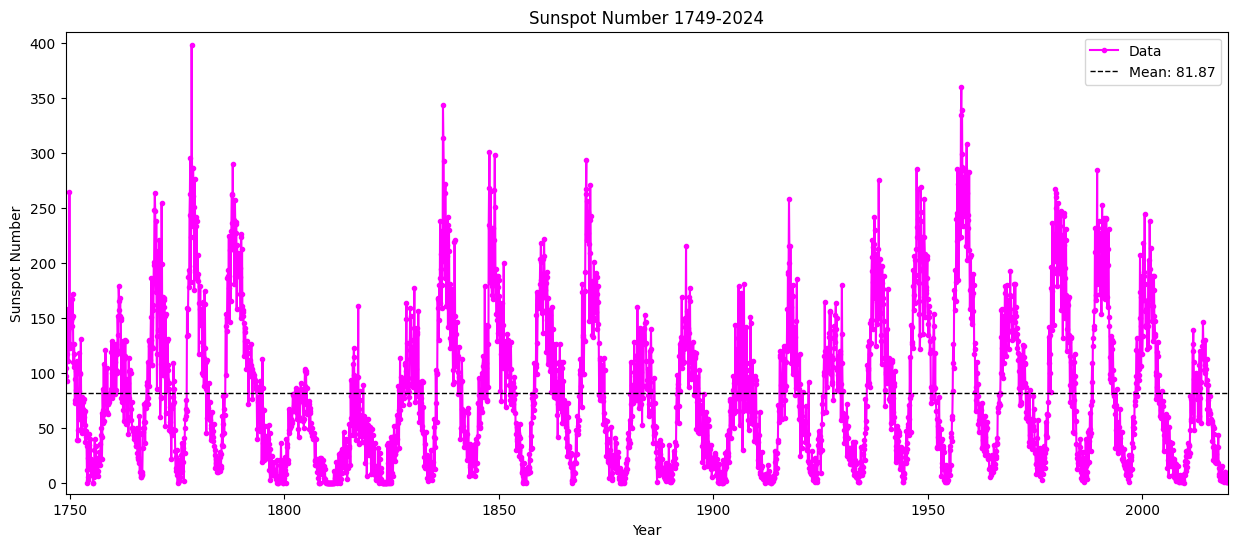

In [6]:
# PLOT THE DATA

# TRY: Change the linestyle and color
# TRY: Add appropriate title

# Some linestyle choices: '-' '--' ':' '-.'
# Some marker choices: '^' 'o' '^' '>' '<' '*' 'x'
# Some color choices: 'blue' 'green' 'cyan' 'olive'
# For colors, you can also just use letters as shorthand: 'b' 'g' 'c' 'y'
fig = plt.figure(figsize=(15, 6))
plt.plot(x, y, linestyle='-', c='magenta', marker='.', label="Data")
plt.title('Sunspot Number 1749-2024')

# TRY: Change the limits on the x and y axes
plt.ylim(-10,410)
plt.xlim(1749,2020)

# Label the axes
plt.xlabel("Year")
plt.ylabel("Sunspot Number")

# Add line to show mean on periodic function
plt.axhline(mean_sunspots, color='black', linestyle='dashed', linewidth=1, label=f'Mean: {mean_sunspots:.2f}')

plt.legend()
plt.show()

###Exercise 2: Estimate the period of the solar cycle by eye
Estimate the period of the solar cycle by eye. Recall, you are looking for the time period on the x-axis from peak to peak or trough to trough (this is the same distance).

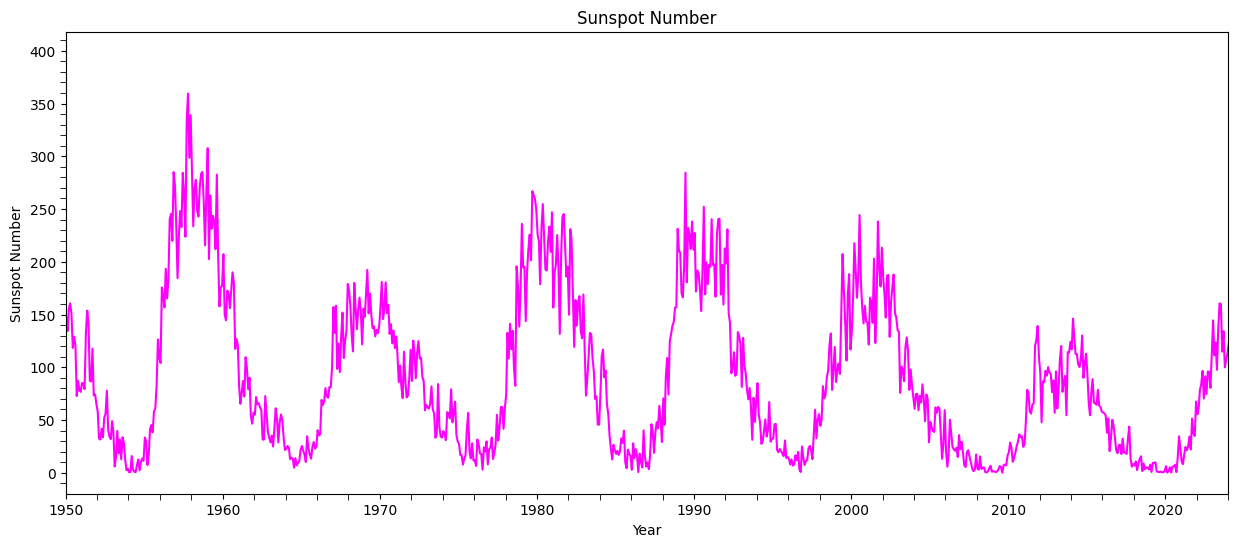

In [7]:
# ESTIMATE SOLAR CYCLE PERIOD BY EYE

# TRY: Plot data
fig = plt.figure(figsize=(15, 6))
plt.plot(x, y, c='magenta')
plt.title('Sunspot Number')
plt.minorticks_on()

#Add minor ticks on axes
plt.tick_params(which='minor', length=4)


# TRY: Change the bounds of the plot using xlim() to zoom in to get a closer look at one cycle
plt.xlim(1950,2024)

#Label the axes
plt.xlabel("Year")
plt.ylabel("Sunspot Number")

plt.show()

In [8]:
#@title Exercise 3: Estimate the period of the solar cycle by overlaying a periodic function

#@markdown Adjust the period of the periodic function overlaying the data using the slider marked as 'Period'. Report the value that you have found that you think fits the data best which is the period of the solar cycle in years. You are looking for the peaks and the troughs of the data and the periodic function to line up, this will not be exact for every cycle but try your best.


def sin(x,A,B,C,D):
  return A*np.sin(B*x+C)+D

A=78.
C=2017.20
D=83.

def plot_sin(Period):
    fig = plt.figure(figsize=(15, 6))
    plt.plot(x, y, c="magenta", label="Data")
    plt.minorticks_on()
    plt.tick_params(which='minor', length=4)


    plt.title('Sunspot Number')
    plt.plot(x, sin(x,A,2*np.pi/Period,C,D),c="black", label="fit")
    plt.xlabel("Year")
    plt.ylabel("Number of Sunspots")
    plt.xlim(1974,2024)
    plt.legend()
    plt.show()


interact(plot_sin,Period=(8,11.1,0.01));

interactive(children=(FloatSlider(value=9.55, description='Period', max=11.1, min=8.0, step=0.01), Output()), …

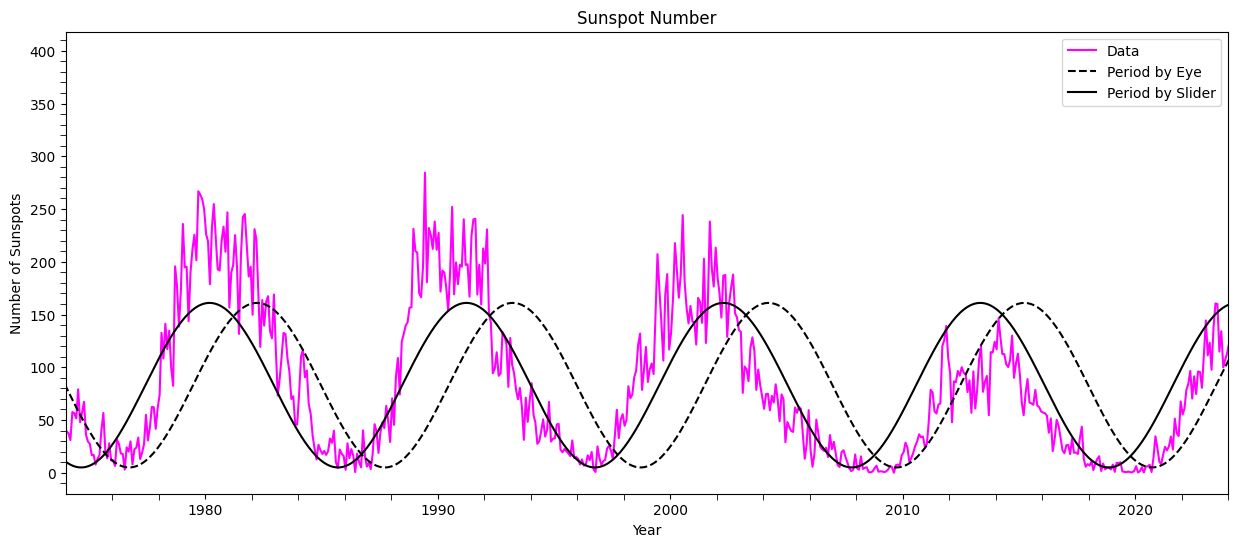

In [9]:
# COMPARE YOUR GUESSES

# TRY: Fill in both periods you found in exercise 2 and 3 and compare the results to the data
Period_eye=11 #Fill in the period guessed by eye
Period_slider=11.05 #Fill in the period found by slider

func1=sin(x,A,2*np.pi/Period_eye,C,D)# Periodic function with period guessed by eye
func2=sin(x,A,2*np.pi/Period_slider,C,D)# Periodic function with period found by slider

#Plot data
fig = plt.figure(figsize=(15, 6))
plt.title('Sunspot Number')

#Add minor ticks on axes
plt.minorticks_on()
plt.tick_params(which='minor', length=4)

# TRY: Plot data, func1 and func2
plt.plot(x, y, c="magenta", label="Data")
plt.plot(x, func1,c="black", ls="--", label="Period by Eye")
plt.plot(x, func2,c="black", label="Period by Slider")

#Change x-axis bounds
plt.xlim(1974,2024)

#Label the axes
plt.xlabel("Year")
plt.ylabel("Number of Sunspots")

plt.legend()
plt.show()

###Exercise 4: Estimate the period of the solar cycle by using $\texttt{curve_fit}$

####Periodic Function: Sine
A sine wave is a periodic function. The equation of a sine wave has 4 parameters that can change its shape, these are a, b, c and d.

$$
y = a\sin\left(bx+c\right) + d.
$$

$$a= \text{ Amplitude}$$
$$2 \pi /b= \text{ Period}$$
$$c= \text{ Phase shift}$$
$$d= \text{ Vertical shift}$$


The amplitude, a, is the amount the function varies, positively or negatively, from zero in the y-direction.
The period, controlled by the parameter b, is the distance on the x-axis that it takes to complete a full cycle. The phase shift, c, indicates how far the function is shifted horizontally from the usual position. Finally the vertical shift, d, moves the function up and down so that the middle value of the function is shifted off of the x-axis.

The figure below gives a visual representation of these parameters.

<div>
<img src="https://www.radfordmathematics.com/functions/circular-functions/transformed-cosine-sine-curves/wave-function-introduction-terminology.png"
width="800"
     />
<figcaption>Fig 9. Parameters of a sine wave (Credit: RadfordMathematics).</figcaption>
</div>



#### $\texttt{curve_fit}$

$\texttt{curve_fit}$ can be used to estimate the parameters of a function given input data. The $\texttt{curve_fit}$ function takes in as inputs 3 things. These are; the fitting function, x-data and y-data. The fitting function is just the shape of the curve that you want $\texttt{curve_fit}$ to draw. As a function, $\texttt{curve_fit}$ takes these inputs and gives outputs. These are the fitting parameters for the function and a value related to the uncertainty in each parameter. To use $\texttt{curve_fit}$ we need to perform the following steps:


1. Load/generate data

2. Define a fitting function

3. Give the fitting function and data to $\texttt{curve_fit}$

4. Print out the estimated parameters

#### $\texttt{curve_fit Linear Example}$
 We will now go through an example using $\texttt{curve_fit}$  on linear data that we generate. When the function to fit is specified as a line, $\texttt{curve_fit}$ will create a line of best fit in the form $y = mx+ b$, where it makes a guess of what it thinks the slope, m, and the y-intercept, b, is.

The slope of the line is: 0.607. The y-intercept is: 0.478.


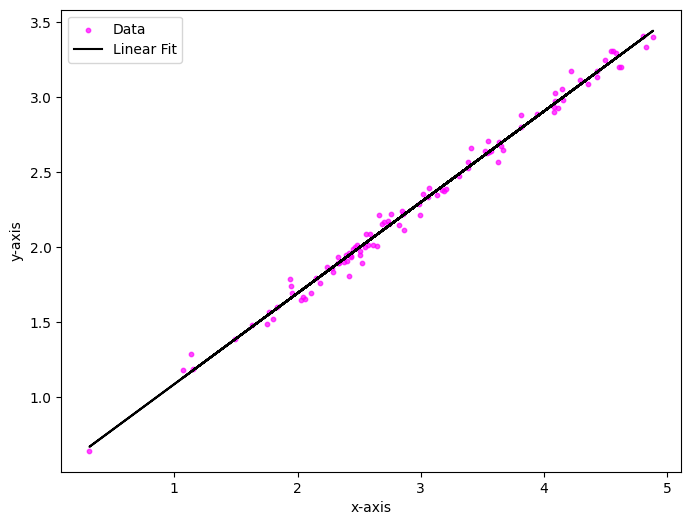

In [10]:
# LINEAR CURVE FIT EXAMPLE

X = np.random.normal(3, 1, 100) # Creates random data with inputs
Y = 0.6 * (X + np.random.normal(0, 0.1, 100)) + 0.5 # Creates random outputs

#Define the equation of a line
def line(x,m,b):

    y =  m*x+b
    return(y)

#Use curve_fit to estimate the slope, parma[0] and y-intercept param[1]
param, _ = curve_fit(line , X, Y)


#Print slope and y-intercept
print("The slope of the line is: {:.3f}. The y-intercept is: {:.3f}.".format(param[0],param[1]))

#Plot data and the line function with parameters found by curve_fit
plt.figure(figsize=(8,6))
plt.scatter(X, Y, color = "magenta", s = 10, label = "Data", alpha = 0.7 )
plt.plot(X, line(X,param[0],param[1]), color = "black", label = "Linear Fit")

#Label axes
plt.xlabel("x-axis")
plt.ylabel("y-axis")

plt.legend()
plt.show()

#### $\texttt{curve_fit}$ Sine

We will now do the same process, but use $\texttt{curve_fit}$ to estimate the parameters of a sine function including the period. The input data is our sunspot data and the parameters of the sin function are a, b, c and d as we have defined above. We will also need an initial guess for these parameters in order to improve how $\texttt{curve_fit}$ estimates our parameters as the periodic function is more complicated to fit than a line.

In [11]:
# CURVE_FIT TO ESTIMATE SOLAR CYCLE PERIOD

#Define a subset of the year and sunspot numbers arrays to use for curve_fit
x1=x[2700:]
y1=y[2700:]

#Define the equation for sin with parameters A,B,C and D using np.sin()
def sin(x,A,B,C,D):
  return A*np.sin(B*x+C)+D


# TRY: Add the function to fit and the data to curve_fit()
param, _ = curve_fit(sin, x1, y1, p0=[100,2*np.pi/11,2011,80])#p0 is the intial guess for a,b,c,d

#Print the parameters a,b,c,d that curve_fit has fitted for
print("The solutions are:\n a = {:.3f}  \n b = {:.3f} \n c = {:.2f} \n d = {:.3f}".format(param[0],param[1],param[2],param[3]))

The solutions are:
 a = 78.082  
 b = 0.569 
 c = 2017.20 
 d = 83.466


The period of the cycle is: 11.049992397649739 years


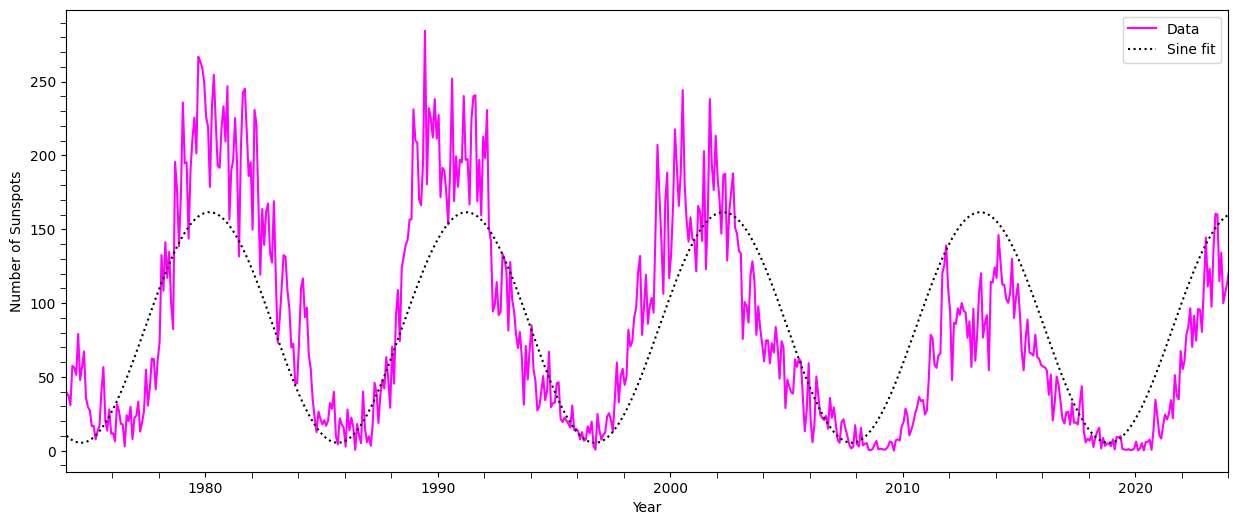

In [12]:
# PLOT CURVE_FIT SINE FUNCTION

# TRY: Print the period of the function that curve_fit has found
print('The period of the cycle is:', 2*np.pi/param[1], 'years')


func3=sin(x1, param[0],param[1],param[2],param[3])# Sin function with period determined by Curve_fit

# TRY: Plot the sine fit curve with the data. Hint: func3 is defined above and the x-coordinates should be x1
fig = plt.figure(figsize=(15, 6))
plt.plot(x1, y1, c="magenta", label="Data")
plt.plot(x1,func3, c="black", ls="dotted", label="Sine fit")

#Add minor ticks on axes
plt.minorticks_on()
plt.tick_params(which='minor', length=4)

#Change x-axis bounds
plt.xlim(1974,2024)

#Label the axes
plt.xlabel("Year")
plt.ylabel("Number of Sunspots")

plt.legend()
plt.show()

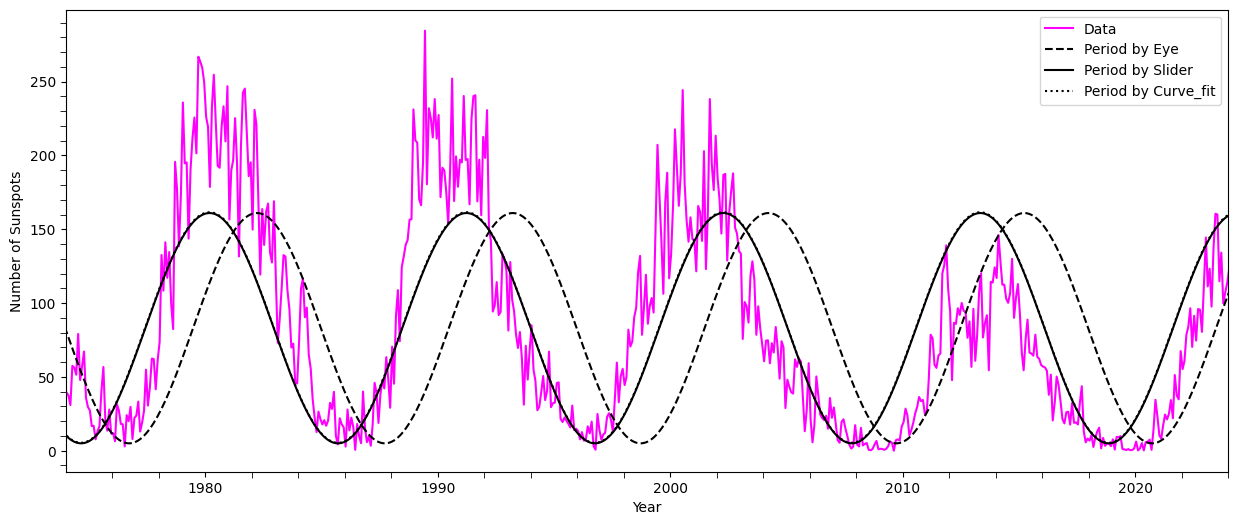

In [13]:
# COMPARE YOUR GUESSES TO CURVE_FIT

# TRY: Plot periodic functions with periods found in exercise 2, 3 and 4 and compare the reuslts to the data. Add labels to each line which will show up in the legend.
fig = plt.figure(figsize=(15, 6))
plt.plot(x1, y1, c="magenta", label="Data")
plt.plot(x, func1,c="black", ls="--", label="Period by Eye")
plt.plot(x, func2,c="black", label="Period by Slider")
plt.plot(x1,func3, c="black", ls="dotted", label="Period by Curve_fit")

#Add minor ticks on axes
plt.minorticks_on()
plt.tick_params(which='minor', length=4)

#Change x-axis bounds
plt.xlim(1974,2024)

#Label the axes
plt.xlabel("Year")
plt.ylabel("Number of Sunspots")

plt.legend()
plt.show()

##References

https://www.nasa.gov/image-article/anatomy-of-sun/

https://www.sidc.be/SILSO/datafiles

https://flexbooks.ck12.org/cbook/ck-12-precalculus-concepts-2.0/section/5.4/primary/lesson/vertical-shift-of-sinusoidal-functions-pcalc/

https://docs.scipy.org/doc/scipy-1.14.0/reference/generated/scipy.optimize.curve_fit.html

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html

https://en.wikipedia.org/wiki/Solar_flare

https://en.wikipedia.org/wiki/Coronal_mass_ejection

https://en.wikipedia.org/wiki/Solar_cycle

https://www.weather.gov/fsd/sunspots

https://www.weather.gov/fsd/sunspots#:~:text=Sunspots%20are%20areas%20where%20the,the%20surrounding%20atmospheric%20pressure%20decreases

https://www.swpc.noaa.gov/phenomena/coronal-mass-ejections

